# Smart Home Energy Usage Analysis

### The goal of this project is to examine energy consumption data from smart home devices, identify usage patterns and peak times, and explore opportunities for energy conservation.

### This project will showcase skills in data mining, time series analysis, predictive modeling, anomaly detection, and data visualization.

In [31]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity


import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Load the dataset
file_path = 'energydata_complete.csv'
data = pd.read_csv(file_path)

In [8]:
# Display the first few rows of the dataset for initial inspection
data.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,11-01-2016 17:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.60,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,11-01-2016 17:10,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.48,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,11-01-2016 17:20,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.37,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,11-01-2016 17:30,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.25,733.8,92.0,6.000000,51.500000,5.0,45.410390,45.410390
4,11-01-2016 17:40,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.13,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [9]:
# Check data types of all columns
data_types = data.dtypes
print(data_types)

date            object
Appliances       int64
lights           int64
T1             float64
RH_1           float64
T2             float64
RH_2           float64
T3             float64
RH_3           float64
T4             float64
RH_4           float64
T5             float64
RH_5           float64
T6             float64
RH_6           float64
T7             float64
RH_7           float64
T8             float64
RH_8           float64
T9             float64
RH_9           float64
T_out          float64
Press_mm_hg    float64
RH_out         float64
Windspeed      float64
Visibility     float64
Tdewpoint      float64
rv1            float64
rv2            float64
dtype: object


In [12]:
# Preprocess the data
# Convert 'date' column to datetime format
data['date'] = pd.to_datetime(data['date'], format='%d-%m-%Y %H:%M')

In [14]:
# Check data type of 'date' column
date_data_type = data['date'].dtype
print(date_data_type)

datetime64[ns]


In [15]:
# Check for missing values
missing_values = data.isnull().sum()
print(f'Missing values: {missing_values}')

Missing values: date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64


#### Missing Values: There are no missing values in any of the columns.

In [16]:
# Examine statistical summaries
statistical_summary = data.describe()
print(f'Statistical summary: {statistical_summary}')

Statistical summary:                       date    Appliances        lights            T1   
count                19735  19735.000000  19735.000000  19735.000000  \
mean   2016-03-20 05:30:00     97.694958      3.801875     21.686571   
min    2016-01-11 17:00:00     10.000000      0.000000     16.790000   
25%    2016-02-14 23:15:00     50.000000      0.000000     20.760000   
50%    2016-03-20 05:30:00     60.000000      0.000000     21.600000   
75%    2016-04-23 11:45:00    100.000000      0.000000     22.600000   
max    2016-05-27 18:00:00   1080.000000     70.000000     26.260000   
std                    NaN    102.524891      7.935988      1.606066   

               RH_1            T2          RH_2            T3          RH_3   
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000  \
mean      40.259739     20.341219     40.420420     22.267611     39.242500   
min       27.023333     16.100000     20.463333     17.200000     28.766667   
25%       37.3

- **Count**: This is the number of non-null observations in each column. In this case, all columns have 19735 entries, indicating that there are no missing values.

- **Mean**: This is the average value of each column. For example, the average energy use of appliances (`Appliances`) is approximately 97.69 Wh.

- **Min**: This is the smallest value in each column. For example, the minimum energy use of appliances (`Appliances`) is 10 Wh.

- **25% (1st Quartile)**: 25% of the data in each column is below this value. For example, 25% of the `Appliances` values are below 50 Wh.

- **50% (Median or 2nd Quartile)**: This is the middle value of each column when the data is sorted in ascending order. For example, the median energy use of appliances (`Appliances`) is 60 Wh.

- **75% (3rd Quartile)**: 75% of the data in each column is below this value. For example, 75% of the `Appliances` values are below 100 Wh.

- **Max**: This is the largest value in each column. For example, the maximum energy use of appliances (`Appliances`) is 1080 Wh.

- **Std (Standard Deviation)**: This measures the dispersion of a dataset relative to its mean. For example, the standard deviation of the `Appliances` column is approximately 102.52 Wh.

This summary helps us understand the distribution of data in each column and identify any potential outliers or errors. 

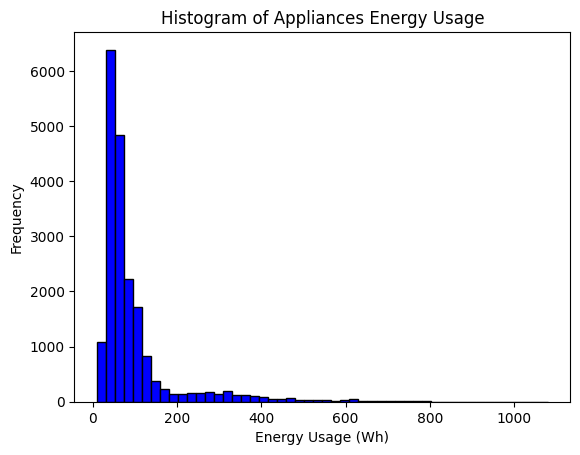

In [18]:
#histogram of the 'Appliances' column
plt.hist(data['Appliances'], bins=50, color='blue', edgecolor='black')

plt.title('Histogram of Appliances Energy Usage')
plt.xlabel('Energy Usage (Wh)'); 
plt.ylabel('Frequency')

plt.show()

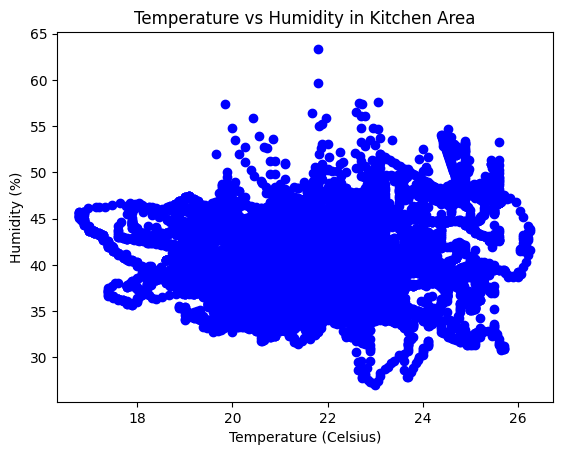

In [20]:
#scatter plot of the 'T1' (Temperature in kitchen area) and 'RH_1' (Humidity in kitchen area) columns
plt.scatter(data['T1'], data['RH_1'], color='blue')

plt.title('Temperature vs Humidity in Kitchen Area')
plt.xlabel('Temperature (Celsius)'); plt.ylabel('Humidity (%)')

plt.show()

From the scatter plot of Temperature vs Humidity in the Kitchen Area, we can observe the following:

1. **Distribution**: The data points are spread across the graph, indicating a wide range of temperature and humidity values recorded in the kitchen area.

2. **Density**: There is a dense concentration of data points around 20–24 degrees Celsius and 45–55% humidity. This suggests that these are the most common temperature and humidity conditions in the kitchen area.

3. **Correlation**: There doesn't seem to be a clear linear relationship between temperature and humidity in the kitchen area. If there were a strong positive or negative correlation, we would see the data points clustered along a line or curve.

4. **Outliers**: There don't appear to be any significant outliers in the data. Most of the data points fall within the main concentration of the graph.

This scatter plot can help us understand the relationship between temperature and humidity in the kitchen area. For example, we might find that certain appliances are used more frequently when the temperature and humidity are within a certain range. This could potentially inform energy-saving strategies in the home.

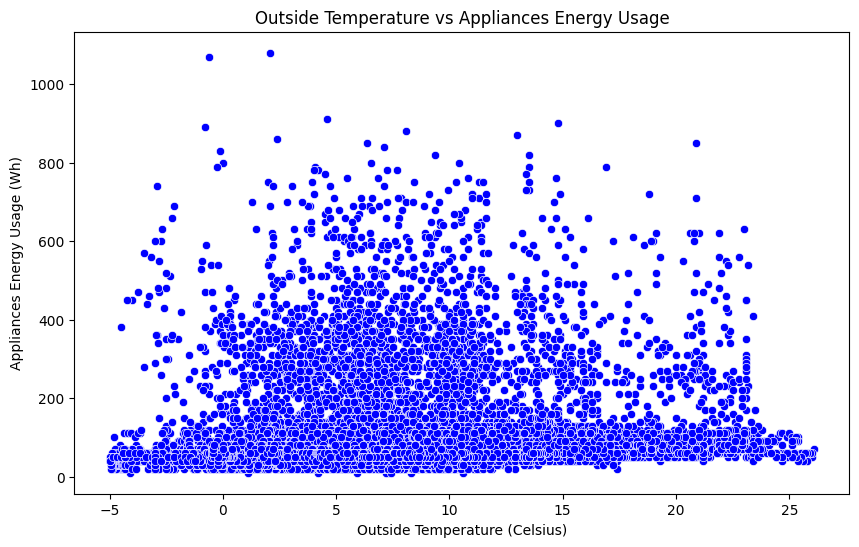

In [24]:
#scatter plot of the 'T_out' (Temperature outside) and 'Appliances' (Appliances energy usage) columns
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['T_out'], y=data['Appliances'], color='blue')

plt.title('Outside Temperature vs Appliances Energy Usage')
plt.xlabel('Outside Temperature (Celsius)'); plt.ylabel('Appliances Energy Usage (Wh)')

plt.show()

#### The scatter plot shows that as the outside temperature increases, the energy usage of appliances also tends to increase. However, there are exceptions, and the relationship is not strictly linear. There are times when the outside temperature is high, but the energy usage is low, and vice versa. This could be due to various factors such as the specific appliances in use, the time of day, and other environmental conditions.

In [25]:
# Dropping unnecessary columns (rv1 and rv2)--random variables according to the description
processed_data = data.drop(['rv1', 'rv2'], axis=1)

In [26]:
# Feature Engineering: Extracting features from 'date' column
processed_data['month_value'] = processed_data['date'].dt.month
processed_data['day_value'] = processed_data['date'].dt.day
processed_data['hour_value'] = processed_data['date'].dt.hour
processed_data['minute_value'] = processed_data['date'].dt.minute
processed_data['weekday'] = processed_data['date'].dt.dayofweek

In [28]:
# Drop 'date' column
processed_data = processed_data.drop('date', axis=1)

In [29]:
processed_data.head()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,month_value,day_value,hour_value,minute_value,weekday
0,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,...,733.5,92.0,7.000000,63.000000,5.3,1,11,17,0,0
1,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,...,733.6,92.0,6.666667,59.166667,5.2,1,11,17,10,0
2,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,...,733.7,92.0,6.333333,55.333333,5.1,1,11,17,20,0
3,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,...,733.8,92.0,6.000000,51.500000,5.0,1,11,17,30,0
4,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,...,733.9,92.0,5.666667,47.666667,4.9,1,11,17,40,0


In [32]:
# Create a binary target variable
median_energy = processed_data['Appliances'].median()
processed_data['EnergyUsage'] = np.where(processed_data['Appliances'] > median_energy, 1, 0)

# Split the data into train and test sets
X = processed_data.drop(['EnergyUsage', 'Appliances'], axis=1)
y = processed_data['EnergyUsage']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a logistic regression model with increased number of iterations
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_scaled, y_train)

# Make predictions and evaluate the model
y_pred = logreg.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.81      0.79      2127
           1       0.77      0.74      0.75      1820

    accuracy                           0.78      3947
   macro avg       0.77      0.77      0.77      3947
weighted avg       0.78      0.78      0.78      3947



- The model was trained to predict whether the energy usage is high (1) or low (0).
- The **accuracy** of 0.78 means that the model correctly predicted the energy usage 78% of the time.
- **Precision** tells us how often the model is correct when it predicts high or low energy usage. The model has a precision of 0.78 for low energy usage and 0.77 for high energy usage. This means that when the model predicts low energy usage, it's correct 78% of the time, and when it predicts high energy usage, it's correct 77% of the time.
- **Recall** tells us how well the model can find all the high or low energy usage instances in the dataset. The model has a recall of 0.81 for low energy usage and 0.74 for high energy usage. This means that the model correctly identifies 81% of all actual low energy usage instances and 74% of all actual high energy usage instances.
- The **F1-score** is a measure that combines precision and recall in a single number. It's a way of looking at the balance between precision and recall. The closer the F1-score is to 1, the better the balance. The model has an F1-score of 0.79 for low energy usage and 0.75 for high energy usage, indicating a good balance between precision and recall for both classes.
- The **support** is simply the number of instances of each class in the dataset. There are 2127 instances of low energy usage and 1820 instances of high energy usage.

In summary, the model does a fairly good job of predicting energy usage, with slightly better performance on low energy usage instances. However, there's always room for improvement. You could consider other models, feature engineering, or hyperparameter tuning to improve the model's performance. I hope this helps! Let me know if you have any other questions.

In [37]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [38]:
k = 3  # We want to find 3 clusters in our data

In [39]:
# We drop the 'EnergyUsage' and 'Appliances' columns because they are not part of the features we want to use for clustering
features = processed_data.drop(['EnergyUsage', 'Appliances'], axis=1)

In [46]:
# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler to the features and transform
scaled_features = scaler.fit_transform(features)

In [47]:
kmeans = KMeans(n_clusters=k)

In [48]:
kmeans.fit(scaled_features)

C:\Users\chara\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [49]:
clusters = kmeans.predict(scaled_features)

In [50]:
processed_data['Cluster'] = clusters

In [45]:
print(processed_data.head())

   Appliances  lights     T1       RH_1    T2       RH_2     T3       RH_3   
0          60      30  19.89  47.596667  19.2  44.790000  19.79  44.730000  \
1          60      30  19.89  46.693333  19.2  44.722500  19.79  44.790000   
2          50      30  19.89  46.300000  19.2  44.626667  19.79  44.933333   
3          50      40  19.89  46.066667  19.2  44.590000  19.79  45.000000   
4          60      40  19.89  46.333333  19.2  44.530000  19.79  45.000000   

          T4       RH_4  ...  Windspeed  Visibility  Tdewpoint  month_value   
0  19.000000  45.566667  ...   7.000000   63.000000        5.3            1  \
1  19.000000  45.992500  ...   6.666667   59.166667        5.2            1   
2  18.926667  45.890000  ...   6.333333   55.333333        5.1            1   
3  18.890000  45.723333  ...   6.000000   51.500000        5.0            1   
4  18.890000  45.530000  ...   5.666667   47.666667        4.9            1   

   day_value  hour_value  minute_value  weekday  EnergyU

In [52]:
cluster_averages = processed_data.groupby('Cluster').mean()
print(cluster_averages)

         Appliances    lights         T1       RH_1         T2       RH_2   
Cluster                                                                     
0        106.359710  2.270214  23.408426  41.550127  22.683535  40.500760  \
1         98.202874  6.013296  20.874200  43.654539  19.991268  42.907159   
2         92.037915  3.646058  21.021125  37.750184  19.056698  39.121340   

                T3       RH_3         T4       RH_4  ...     RH_out   
Cluster                                              ...              
0        24.559451  39.049564  23.167264  39.614200  ...  70.416695  \
1        21.075970  43.338219  19.357321  44.108797  ...  88.050182   
2        21.437307  37.305660  20.166385  36.108320  ...  81.400761   

         Windspeed  Visibility  Tdewpoint  month_value  day_value  hour_value   
Cluster                                                                         
0         3.666148   36.794316   7.465313     4.564962  14.538010   12.408604  \
1         5.966

In [51]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Prepare the features and target variable
X = processed_data.drop(['EnergyUsage', 'Appliances'], axis=1)
y = processed_data['Appliances']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#The y_test variable contains the actual values for the test set. 
#These are the true energy usage values for the test set observations.

# Initialize the model
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Fit the model to the training data
gb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_gb = gb_model.predict(X_test)

#The y_pred_gb variable contains the predicted values for the test set.
#The performance of your model is then evaluated by comparing these predicted values (y_pred_gb) to the actual values (y_test). 
#I hope this helps! Let me know if you have any other questions.

# Calculate performance metrics
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print(f'Mean Squared Error (MSE): {mse_gb}')
print(f'R-squared (R2 ): {r2_gb}')

Mean Squared Error (MSE): 6933.25060667759
R-squared (R2 ): 0.3071662342724828


1. **Mean Squared Error (MSE) - 6933.25**: The MSE is a measure of the average squared difference between the actual and predicted values. A lower MSE indicates a better fit of the model to the data. In this case, the MSE of 6933.25 implies that the model's predictions are, on average, approximately 83.27 units (the square root of MSE, also known as RMSE) away from the actual energy usage values.

2. **R-squared (R2) - 0.307**: The R2 score is a statistical measure that represents the proportion of the variance for the dependent variable that's explained by the independent variables. It ranges from 0 to 1, where 1 indicates that the independent variables perfectly predict the dependent variable. An R2 score of 0.307 means that about 30.7% of the variability in the energy usage can be explained by the features in the model.

3. **Model Performance**: The model has an average error of about 83.27 units when predicting the energy usage. This means that, on average, the predictions made by the model are about 83.27 units away from the actual values.

4. **Model Interpretation**: The model can explain about 30.7% of the variability in energy usage. This suggests that while the model has learned some patterns in the data, there's still a large portion of variability in energy usage that the model isn't able to explain.

5. **Improvement Opportunities**: Given the current performance of the model, there might be opportunities for improvement. This could involve trying different models, tuning the model's hyperparameters, or engineering new features to improve the model's ability to explain the variability in energy usage.